## Convolutional Neural Network

In [15]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image
%matplotlib inline

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]

We scale the data to be in $[-1,1]$.

In [17]:
x_train, x_test = x_train / 127.5 - 1, x_test / 127.5 - 1

The size of each data points is $28 \times 28$. Vectorize the datapoints for visualization and preliminary questions.

In [18]:
nb_features = np.prod(x_train.shape[1:])
x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))

In [19]:
print(x_train.shape)

(60000, 784)


### Convolutional Neural Network 
compares with a Convolutional Neural Network (CNN). CNNs leverage dependencies between neighbouring pixels, making them more efficient and light weight compared to their fully connected counter part. In this section we will implement a Class CNN similar to the one we defined before for MLP.

Implement a CNN of the shape [32, 64, 128]; where 32, 64, 128 represent the number of convolutional filters for each hidden layer. We will use a kernel size of size $4\times4$. 

Use a stride of 1 in the first convolutional layer, followed by a stride of 2 for the following layers (a stride of two help downsampling without requiring the use of pooling layers). Vectorize the obtained output using tf.layer.flatten, and end the model with a fully connected layer of 10 neurons. Use ReLU as the non linear activation for the hidden layers.

   The function 'create_model' to complete defines the class variables: 

   + self.logits $\in \mathbb{R^{10}}$ containing the output without activation of the last __<font color='red'>fully connected layer</font>.__ 

   + self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.

- Using self.logits complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss. 

###  Visualizing learned filters and activations 
It is sometimes useful to visualize what kind of filters a CNN have learned. One way to do so is to plot each filter of size [kernel_size $\times$ kerne_size]. 

- Access its filters via 'tf.get_collection' and plot them on a grid for each layer. 
- Plot the activations of each layer for two images chosen from digit-classes '2' and '9'.

The plotted feature maps and learned filters should be plotted in the same way as in the images bellow. (left: Feature Maps, right: learned Filters)
![Examples of activation maps (left), and learned features (right))](im.png)

In [10]:
model.model_vars
# kernel = sess.run('variable')

[<tf.Variable 'CNN/self.hl_1/kernel:0' shape=(4, 4, 1, 32) dtype=float32_ref>,
 <tf.Variable 'CNN/self.hl_1/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'CNN/hl_2/kernel:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
 <tf.Variable 'CNN/hl_2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CNN/hl_3/kernel:0' shape=(4, 4, 64, 128) dtype=float32_ref>,
 <tf.Variable 'CNN/hl_3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'CNN/logits/kernel:0' shape=(2048, 10) dtype=float32_ref>,
 <tf.Variable 'CNN/logits/bias:0' shape=(10,) dtype=float32_ref>]

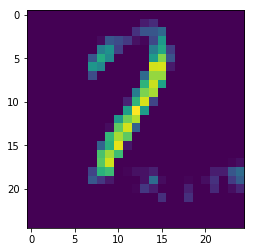

In [47]:
# For feature maps
x_test_a = x_test[1]
feature_map = sess.run(model.hl_1, feed_dict={model.im: x_test_a.reshape(1,28,28,1)}) # 32 feature maps, the output will be (25, 25, 32)

for i in range(32):
    im = feature_map[:,:,:,i].reshape(25,25)
    plt.imshow(im)

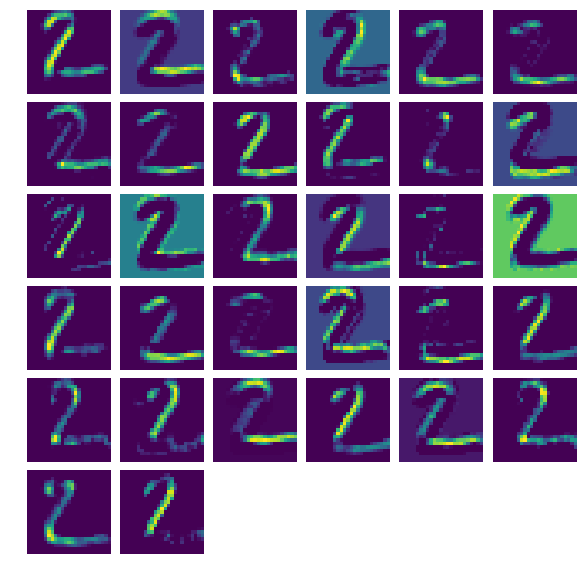

In [45]:
# For feature maps of 2
plt.figure(num = 'feature_map',figsize = (10,10))
for i in range(32):
    plt.subplot(6,6,i+1)
#     plt.title('')

    im = feature_map[:,:,:,i].reshape(25,25)
    plt.imshow(im)
    
#     plt.imshow(kernel[:,:,0,i])
    plt.axis('off')
#     plt.axes.get_xaxis().set_visible(False)
#     plt.axes.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0.01, hspace=0.1)
# plt.subplots_adjust(bottom =0.3, top = 0.7,wspace=0.1,hspace =0.1)
plt.show()

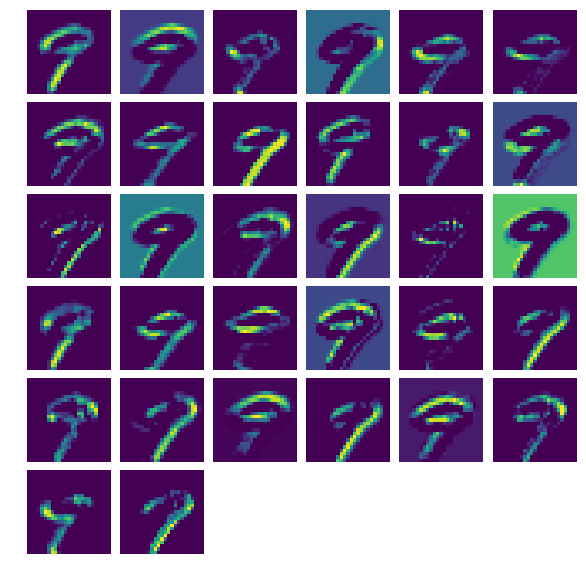

<Figure size 432x288 with 0 Axes>

In [54]:
# For feature maps of 9
x_test_a = x_test[9]
feature_map = sess.run(model.hl_1, feed_dict={model.im: x_test_a.reshape(1,28,28,1)})

plt.figure(num = 'feature_map',figsize = (10,10))
for i in range(32):
    plt.subplot(6,6,i+1)

    im = feature_map[:,:,:,i].reshape(25,25)
    plt.imshow(im)
    
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.1)
# plt.subplots_adjust(bottom =0.3, top = 0.7,wspace=0.1,hspace =0.1)
plt.show()
plt.savefig('10.pdf')

In [12]:
with tf.variable_scope("CNN", reuse=tf.AUTO_REUSE):
    kernel = tf.get_variable("self.hl_1/kernel")
    kernel = sess.run(kernel)
    print(kernel.shape)
    print(kernel)

(4, 4, 1, 32)
[[[[-6.29470963e-03 -9.03014764e-02 -1.03512466e-01  7.29031339e-02
    -8.30568820e-02  7.89934695e-02  6.32887036e-02 -4.40784218e-03
     9.18625202e-03 -2.27790549e-02  7.93099329e-02 -3.42300646e-02
    -1.53356744e-02  8.48028287e-02  2.86405627e-03  4.40484397e-02
    -2.93964799e-02 -1.14563084e-03 -1.40137315e-01  9.14897993e-02
     5.92400436e-04 -5.60697205e-02  7.09417984e-02  1.45609695e-02
    -1.35986567e-01 -3.74718532e-02 -1.17034927e-01  8.26634020e-02
    -6.54276228e-03  4.09242287e-02  1.69738494e-02 -7.57909715e-02]]

  [[-1.34648800e-01 -1.68525781e-02  1.02595985e-01 -3.64367217e-02
     1.08487770e-01 -3.97210456e-02 -9.61646065e-02 -1.07245177e-01
     1.40101045e-01  9.82703920e-03  1.61579847e-01 -2.71680858e-02
     1.04796506e-01 -3.82694975e-02 -8.65103528e-02  1.19770162e-01
     8.58266354e-02 -2.07490008e-02 -1.38704091e-01  1.00435019e-01
    -1.27669692e-01 -5.60188061e-03  1.46116957e-01  4.22912240e-02
     1.36366457e-01  1.07115880

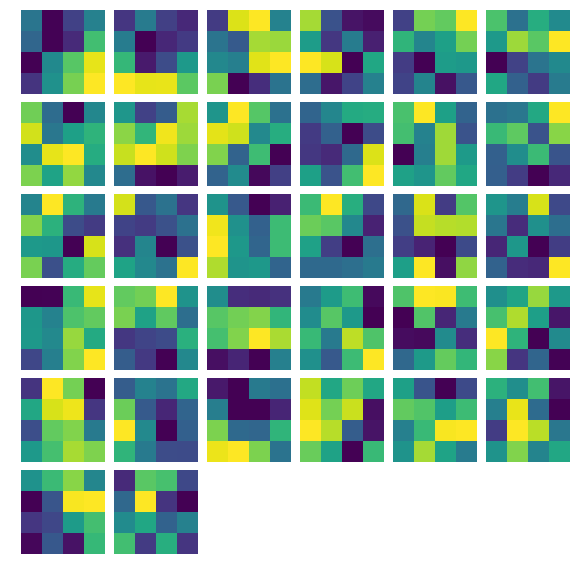

In [40]:
plt.figure(num = 'kernel',figsize = (10,10))
for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(kernel[:,:,0,i])
    plt.axis('off')

    plt.subplots_adjust(wspace=0.01, hspace=0.1)
# plt.subplots_adjust(bottom =0.3, top = 0.7,wspace=0.1,hspace =0.1)
plt.show()